In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def load_data():
    df=pd.read_csv("shipping-data.csv")
    return df


In [3]:
def create_visual_for_shipping_per_warehouse(df):
    df=df.copy()
    plt.figure()
    counts=df.Warehouse_block.value_counts()
    counts.plot.bar(
        title="Shipping per warehouse",
        xlabel="Warehouse block",
        ylabel="Record count",
        color="tab:blue",
        fontsize=8,
    )
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    plt.savefig("shipping_per_warehouse.png")
    return counts



<Figure size 640x480 with 0 Axes>

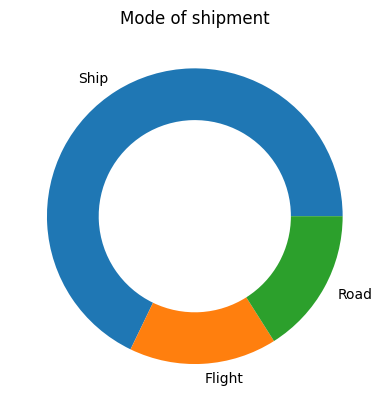

In [4]:
def create_visual_for_mode_of_shipment(df):
    df=df.copy()
    plt.figure()
    counts=df.Mode_of_Shipment.value_counts()
    counts.plot.pie(
        title="Mode of shipment",
        wedgeprops=dict(width=0.35),
        ylabel="",
        color=("tab:blue","tab:orange","tab:green"),
        
    )
plt.savefig("mode_of_shipment.png")

df=load_data()
create_visual_for_mode_of_shipment(df)

In [5]:
def create_visual_for_average_customer_rating(df):
    df=df.copy()
    plt.figure()
    df=(
        df[["Mode_of_Shipment","Customer_rating"]]
        .groupby("Mode_of_Shipment")
        .describe()
    )
    df.columns=df.columns.droplevel()
    df=df[["mean","min","max"]]
    plt.barh(
        y=df.index.values,
        width=df["max"].values-1,
        left=df["min"].values,
        height=0.9,
        color="lightgray",
        alpha=0.8,
        )
    colors=[
        "tab:green" if value >= 3.0 else "tab:orange" for value in df["mean"].values
    ]
    plt.barh(
        y=df.index.values,
        width=df["mean"].values -1,
        left=df["min"].values,
        color=colors,
        height=0.5,
        alpha=1.0,
        )
    plt.title("Average customer rating")
    plt.gca().spines["left"].set_color("gray")
    plt.gca().spines["bottom"].set_color("gray")
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    plt.savefig("average_customer_rating.png")


    

In [6]:
def create_visual_for_weight_distribution(df):
    df=df.copy()
    plt.figure()
    df.Weight_in_gms.plot.hist(
        title="Shipped weight distribution",
        color="tab:orange",
        edgecolor="white",
    )
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    plt.savefig("Weight_distribution.png")


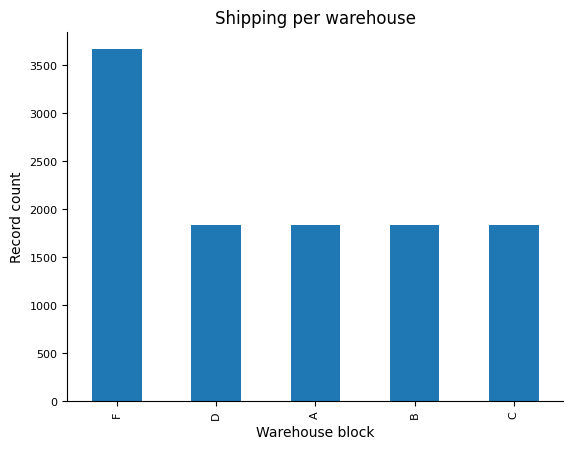

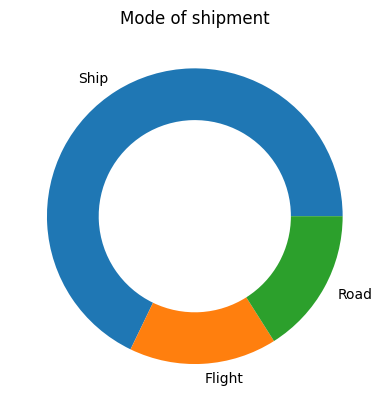

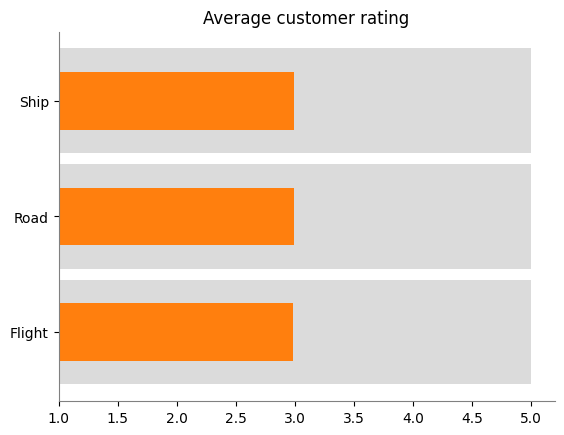

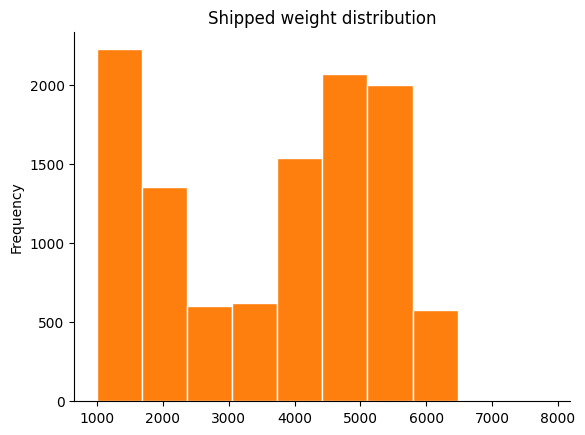

In [7]:
df=load_data()
create_visual_for_shipping_per_warehouse(df)
create_visual_for_mode_of_shipment(df)
create_visual_for_average_customer_rating(df)
create_visual_for_weight_distribution(df)



In [8]:
%%writefile index.html

<!DOCTYPE html>
<html>
    <body>

        <h1>Shipping Dashboard Example</h1>

        <div style="width:45%; float:left;">
            <img src="shipping_per_warehouse.png" alt="Fig 1">
            <img src="mode_of_shipment.png" alt="Fig 2">
        </div>

        <div style="width:45%; float:left;">
            <img src="average_customer_rating.png" alt="Fig 3">
            <img src="weight_distribution.png" alt="Fig 4">
        </div>
    </body>
</html>


Overwriting index.html
